**DATA EXPLORATION**

In [243]:
import pandas as pd 
df = pd.read_excel('data_rumah.xlsx')
print(df.head())

   Unnamed: 0                                              judul   
0           0                      Promo Rumah Mewah Akhir Tahun  \
1           1  Rumah modern Readystock di bandung raya cimahi...   
2           2  Dijual rumah 300 jutaan jalan lebar dekat Ikea...   
3           3  Dijual PROMO rumah 2 lantai di sayap Setiabudi...   
4           4  Rumah Strategis Siap Huni di dekat Tol Cileuny...   

                   alamat                                          deskripsi   
0       Antapani, Bandung  Promo akhir tahun !! Hanya 500 jt-an + FREE SH...  \
1  Bandung Wetan, Bandung  Rumah Baru modern 2 LT di Sayap Kota Cimahi de...   
2     Padalarang, Bandung  *Jadilah konsumen CERDAS !* *Tips singkat sebe...   
3                 Bandung  Copy writing nasc  NUANSA ALAM SETIABUDHI CLOV...   
4   Cibiru Hilir, Bandung  Hunian Nyaman di Cibiru, Cileunyi, Bandung Tim...   

   kamar  bangunan  lahan      harga  
0      3        75     84  590000000  
1      3        70     71  70000

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1470 non-null   int64 
 1   judul       1470 non-null   object
 2   alamat      1470 non-null   object
 3   deskripsi   1468 non-null   object
 4   kamar       1470 non-null   int64 
 5   bangunan    1470 non-null   int64 
 6   lahan       1470 non-null   int64 
 7   harga       1470 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 92.0+ KB


In [245]:
df.describe()

,Unnamed: 0,kamar,bangunan,lahan,harga
count,1470.000000,1470.000000,1470.000000,1470.000000,1.470000e+03
mean,734.500000,3.646259,177.489116,210.235374,2.581586e+09
std,424.496761,2.535528,176.726326,500.109095,4.358051e+09
min,0.000000,0.000000,0.000000,0.000000,6.500000e+07
25%,367.250000,2.000000,65.000000,80.000000,6.750000e+08
50%,734.500000,3.000000,122.500000,120.000000,1.370000e+09
75%,1101.750000,4.000000,230.000000,210.000000,3.000000e+09
max,1469.000000,47.000000,1850.000000,15000.000000,5.700000e+10


In [246]:
df.describe(include='object')  

,judul,alamat,deskripsi
count,1470,1470,1468
unique,1431,140,1418
top,"Rumah Pusat Kota, sayap Martanegara Bandung, J...",Bandung,BUMI KRESNA ASRI Jln. Terusan Cibaduyut Ranc...
freq,3,253,5


In [247]:
df.columns

Index(['Unnamed: 0', 'judul', 'alamat', 'deskripsi', 'kamar', 'bangunan',
       'lahan', 'harga'],
      dtype='object')

In [248]:
df.shape

(1470, 8)

In [249]:
df.columns = ['ID', 'judul', 'alamat', 'deskripsi', 'kamar', 'luas_bangunan','luas_lahan', 'harga']

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             1470 non-null   int64 
 1   judul          1470 non-null   object
 2   alamat         1470 non-null   object
 3   deskripsi      1468 non-null   object
 4   kamar          1470 non-null   int64 
 5   luas_bangunan  1470 non-null   int64 
 6   luas_lahan     1470 non-null   int64 
 7   harga          1470 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 92.0+ KB


*Histogram untuk Distribusi Harga*

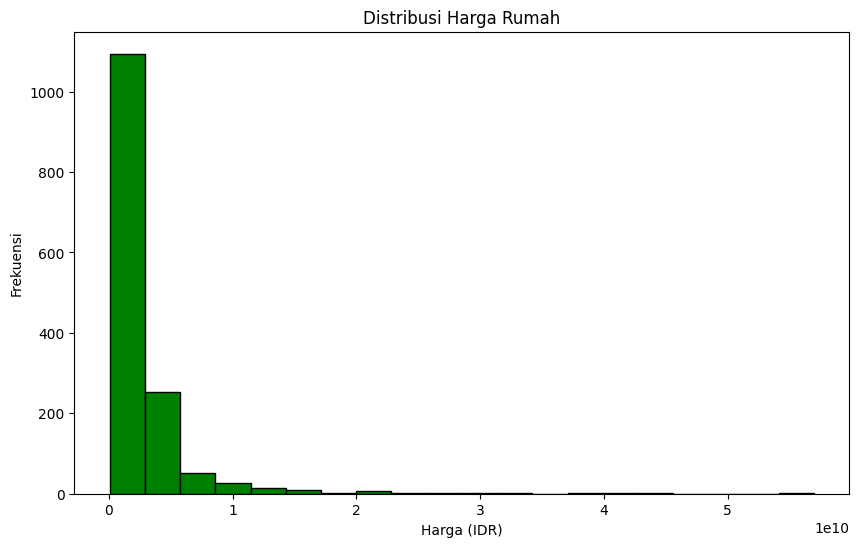

In [251]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df['harga'], bins=20, color='green', edgecolor='black')
plt.title('Distribusi Harga Rumah')
plt.xlabel('Harga (IDR)')
plt.ylabel('Frekuensi')
plt.show()


*Scatter Plot Hubungan antara Luas Bangunan VS Harga*

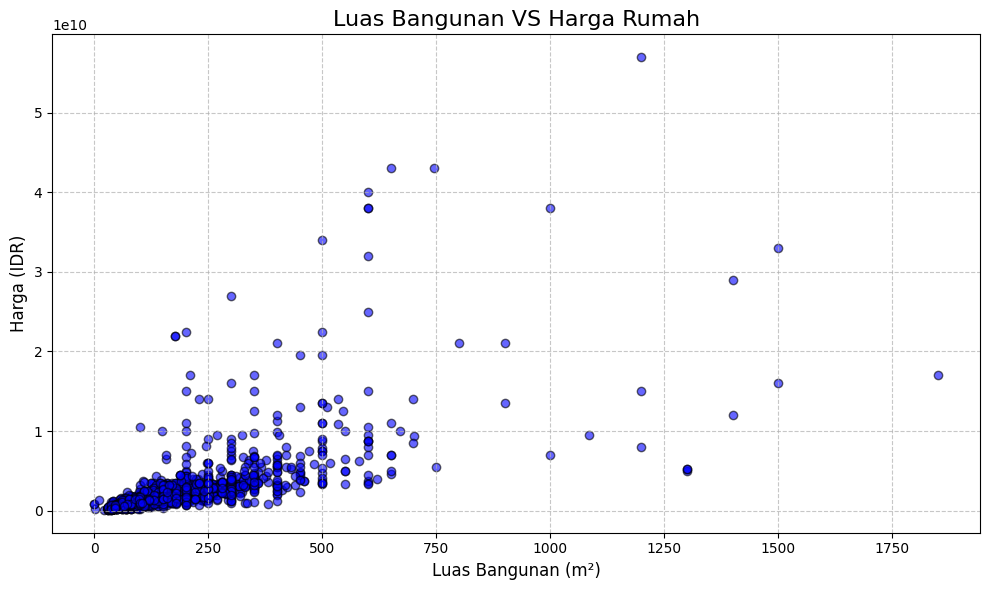

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['luas_bangunan'], df['harga'], color='blue', alpha=0.6, edgecolor='black')
plt.title('Luas Bangunan VS Harga Rumah', fontsize=16)
plt.xlabel('Luas Bangunan (m²)', fontsize=12)
plt.ylabel('Harga (IDR)', fontsize=12)

plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

*hubungan antar variabel numerik jumlah kamar, luas bangunan, luas lahan, dan harga*

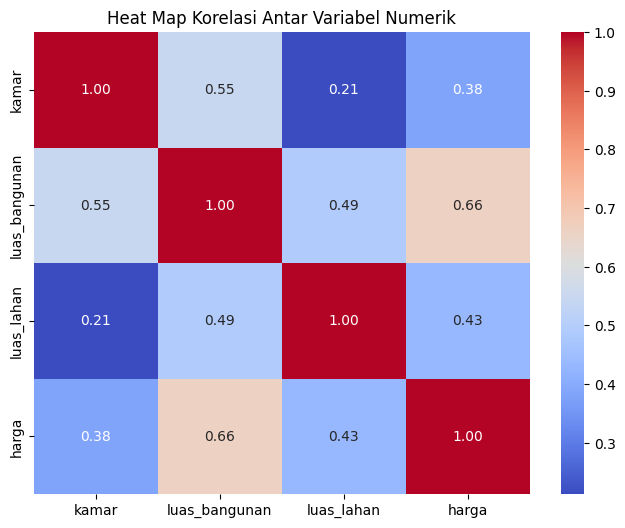

In [253]:
correlation_matrix = df[['kamar', 'luas_bangunan', 'luas_lahan', 'harga']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heat Map Korelasi Antar Variabel Numerik')
plt.show()


*Bar Chart untuk Jumlah Rumah per Lokasi*

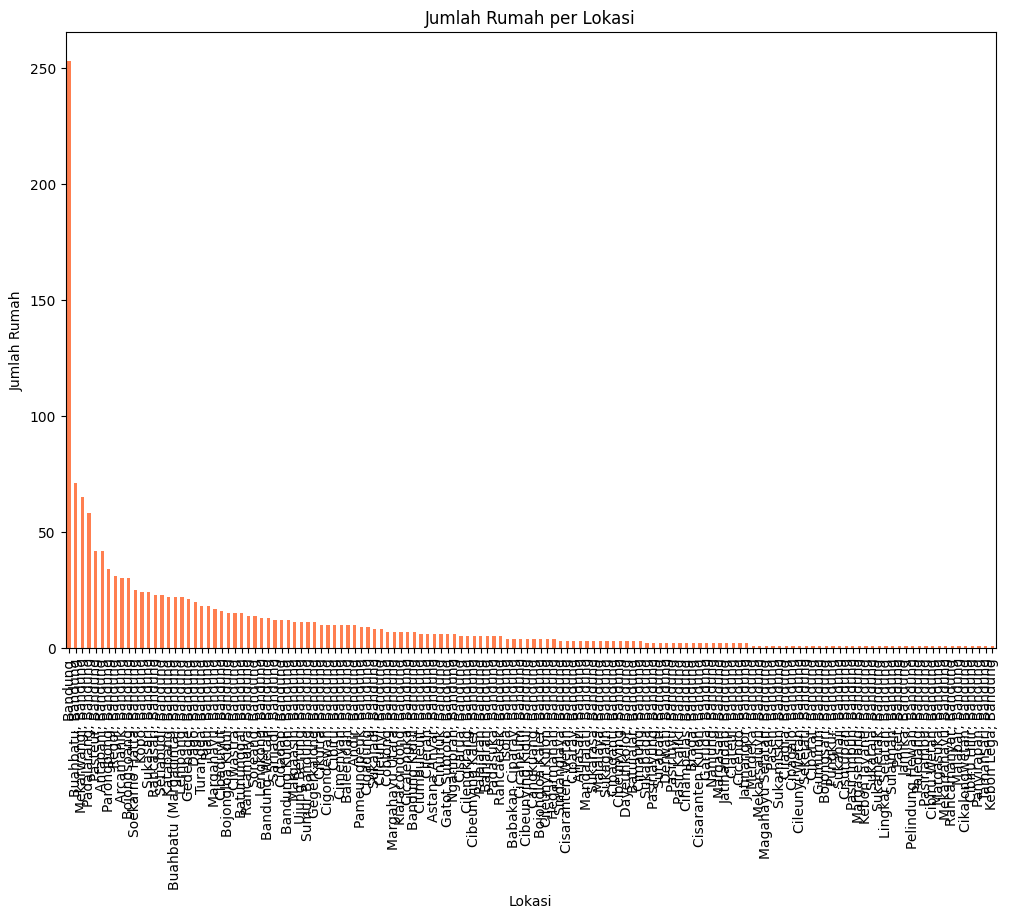

In [254]:
rumah_per_alamat = df['alamat'].value_counts()

plt.figure(figsize=(12,8))
rumah_per_alamat.plot(kind='bar', color='coral')
plt.title('Jumlah Rumah per Lokasi')
plt.xlabel('Lokasi')
plt.ylabel('Jumlah Rumah')
plt.xticks(rotation=90)
plt.show()


*Outlier Harga*

In [255]:
import pandas as pd

Q1 = df['harga'].quantile(0.25)  
Q3 = df['harga'].quantile(0.75) 
IQR = Q3 - Q1                    

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['harga'] < lower_bound) | (df['harga'] > upper_bound)]

print("Jumlah outlier pada kolom harga:", len(outliers))
print("Batas bawah:", lower_bound)
print("Batas atas:", upper_bound)
print("\nOutlier pada kolom harga:")
print(outliers)


Jumlah outlier pada kolom harga: 106
Batas bawah: -2812500000.0
Batas atas: 6487500000.0

Outlier pada kolom harga:
        ID                                              judul   
8        8  LANGKA!!! Dijual rumah kos strategis lokasi pr...  \
14      14  STRATEGIS!!! Dijual rumah murah sayap setrasar...   
142    142  HUNIAN MEWAH BERKONSEP  DESIGN ARCHITECTURAL D...   
162    162  Dijual Kos Kosan "Sweet Home" di Bandung Lokas...   
181    181             Rumah Mewah di Sayap Cipaganti Bandung   
...    ...                                                ...   
1395  1395  DIJUAL Rumah Lux Minimalis di Setiabudi Regenc...   
1407  1407                                Rumah di Sayap Riau   
1437  1437  Jual Rumah Siap Huni Full Furnished Dago Pakar...   
1443  1443  Jual Rumah Siap Huni Full Furnished Dago Pakar...   
1456  1456  Rumah eklusif bangun sangat bagus terawat loka...   

                    alamat                                          deskripsi   
8            Dago, Ban

*Visualisasi outlier Harga*

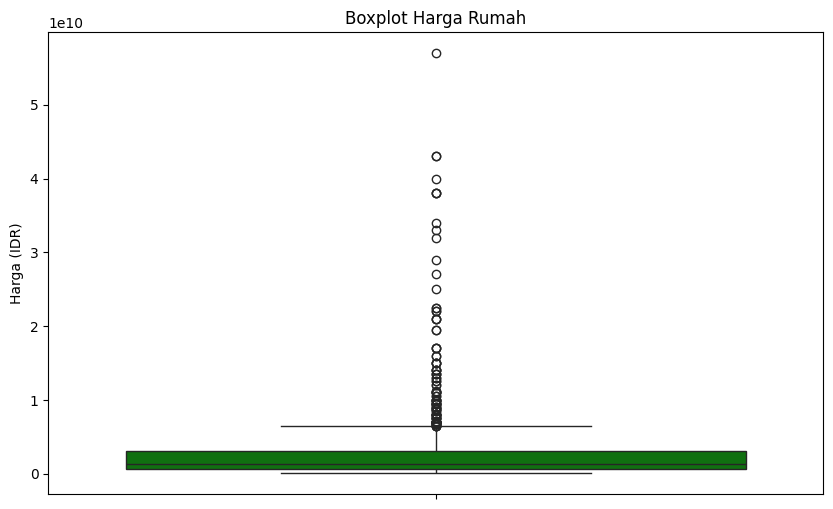

In [256]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='harga', color='green')
plt.title('Boxplot Harga Rumah')
plt.ylabel('Harga (IDR)')
plt.show()

*Outlier Kamar*

In [257]:
import pandas as pd

Q1 = df['kamar'].quantile(0.25)  
Q3 = df['kamar'].quantile(0.75) 
IQR = Q3 - Q1                    

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['kamar'] < lower_bound) | (df['kamar'] > upper_bound)]

print("Jumlah outlier pada kolom kamar:", len(outliers))
print("Batas bawah:", lower_bound)
print("Batas atas:", upper_bound)
print("\nOutlier pada kolom kamar:")
print(outliers)

Jumlah outlier pada kolom kamar: 47
Batas bawah: -1.0
Batas atas: 7.0

Outlier pada kolom kamar:
        ID                                              judul   
38      38  Rumah Kost Bangunan Baru + Kios Turun Harga di...  \
118    118  Jual murah rumah minimalis, Mekar Wangi, Bandu...   
134    134  JUAL Rumah SEHAT  2 Lantai di SETIABUDI REGENC...   
162    162  Dijual Kos Kosan "Sweet Home" di Bandung Lokas...   
218    218           Rumah di sayap dago sultan agung bandung   
220    220  For Sale Rumah di Setiabudi, Cipaganti Apprais...   
256    256  Rumah Kost Dekat Samsat Soekarno Hatta Bypass ...   
282    282  Readystock Rumah Nuansa Islami Lembang Bandung...   
305    305  Rumah Kost Siap Pakai di Dekat STT Telkom Tol ...   
313    313  Rumah dijual murah di Buahbatu Bandung, luas b...   
330    330  Rumah Semi minimalis di Sarikaso, Sarijadi, co...   
338    338  Rumah hot istimewa di jl Taman Pramuka kota Ba...   
359    359               Jual Rumah Pilar Biru  Bandung ti

*Visualisasi Outlier Kamar*

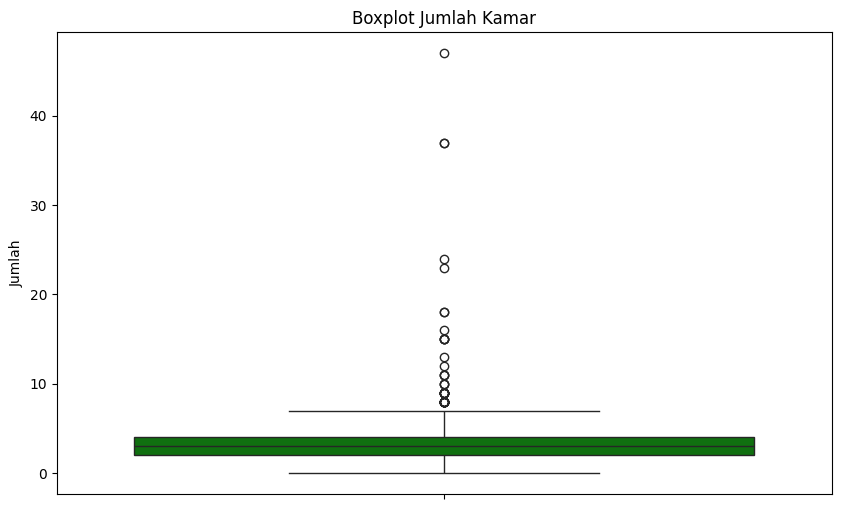

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='kamar', color='green')
plt.title('Boxplot Jumlah Kamar')
plt.ylabel('Jumlah')
plt.show()

**DATA PREPARATION**

*DATA CLEANING*

In [259]:
jumlah_duplikat = df.duplicated().sum()
print(f'Jumlah data duplikat: {jumlah_duplikat}')

Jumlah data duplikat: 0


*DATA NULL*

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             1470 non-null   int64 
 1   judul          1470 non-null   object
 2   alamat         1470 non-null   object
 3   deskripsi      1468 non-null   object
 4   kamar          1470 non-null   int64 
 5   luas_bangunan  1470 non-null   int64 
 6   luas_lahan     1470 non-null   int64 
 7   harga          1470 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 92.0+ KB


In [261]:
missing_value = df.isnull().sum()
print(missing_value)

ID               0
judul            0
alamat           0
deskripsi        2
kamar            0
luas_bangunan    0
luas_lahan       0
harga            0
dtype: int64


In [262]:
df.columns = ['ID', 'judul', 'alamat', 'deskripsi', 'kamar', 'luas_bangunan', 'luas_lahan', 'harga']
df.to_excel('data_rumah_updated.xlsx', index=False)  


In [263]:
print(df.columns)


Index(['ID', 'judul', 'alamat', 'deskripsi', 'kamar', 'luas_bangunan',
       'luas_lahan', 'harga'],
      dtype='object')


*Mengoreksi nilai yang tidak valid*

In [264]:
kamar_kosong = df[df['kamar'] < 1]
luas_bangunan_kosong = df[df['luas_bangunan'] < 20]
luas_lahan_kosong = df[df['luas_lahan'] < 20]
negatif_harga = df[df['harga'] < 0]

print("Jumlah data dengan kamar kosong:", len(kamar_kosong))
print("Jumlah data dengan luas bangunan tidak valid:", len(luas_bangunan_kosong))
print("Jumlah data dengan luas lahan tidak valid:", len(luas_lahan_kosong))
print("Jumlah data dengan harga negatif:", len(negatif_harga))

Jumlah data dengan kamar kosong: 8
Jumlah data dengan luas bangunan tidak valid: 4
Jumlah data dengan luas lahan tidak valid: 3
Jumlah data dengan harga negatif: 0


In [265]:
df = df[df['kamar'] >= 1]
df = df[df['luas_bangunan'] >= 20]
df = df[df['luas_lahan'] >= 20]
print("Jumlah data setelah penghapusan:", len(df))


Jumlah data setelah penghapusan: 1456


*Hapus Data Outlier*

In [266]:
import pandas as pd

Q1 = df['kamar'].quantile(0.25)  
Q3 = df['kamar'].quantile(0.75) 
IQR = Q3 - Q1                    

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['kamar'] < lower_bound) | (df['kamar'] > upper_bound)]

print("Jumlah outlier pada kolom kamar:", len(outliers))
print("Batas bawah:", lower_bound)
print("Batas atas:", upper_bound)
print("\nOutlier pada kolom kamar:")
print(outliers)

Jumlah outlier pada kolom kamar: 47
Batas bawah: -1.0
Batas atas: 7.0

Outlier pada kolom kamar:
        ID                                              judul   
38      38  Rumah Kost Bangunan Baru + Kios Turun Harga di...  \
118    118  Jual murah rumah minimalis, Mekar Wangi, Bandu...   
134    134  JUAL Rumah SEHAT  2 Lantai di SETIABUDI REGENC...   
162    162  Dijual Kos Kosan "Sweet Home" di Bandung Lokas...   
218    218           Rumah di sayap dago sultan agung bandung   
220    220  For Sale Rumah di Setiabudi, Cipaganti Apprais...   
256    256  Rumah Kost Dekat Samsat Soekarno Hatta Bypass ...   
282    282  Readystock Rumah Nuansa Islami Lembang Bandung...   
305    305  Rumah Kost Siap Pakai di Dekat STT Telkom Tol ...   
313    313  Rumah dijual murah di Buahbatu Bandung, luas b...   
330    330  Rumah Semi minimalis di Sarikaso, Sarijadi, co...   
338    338  Rumah hot istimewa di jl Taman Pramuka kota Ba...   
359    359               Jual Rumah Pilar Biru  Bandung ti

In [267]:
df_cleaned = df[(df['kamar'] >= lower_bound) & (df['kamar'] <= upper_bound)]

print("Jumlah data sebelum penghapusan outlier:", len(df))
print("Jumlah data setelah penghapusan outlier:", len(df_cleaned))


Jumlah data sebelum penghapusan outlier: 1456
Jumlah data setelah penghapusan outlier: 1409


*Independent Component Analysis (ICA) kolom alamat, hapus keterangan Bandung*

In [268]:
import pandas as pd
from sklearn.decomposition import FastICA

bandung_only_count = df_cleaned[df_cleaned['alamat'].str.strip() == 'Bandung'].shape[0]
print(f"Jumlah baris yang hanya berisi 'Bandung': {bandung_only_count}")

Jumlah baris yang hanya berisi 'Bandung': 239


In [269]:
df_cleaned = df_cleaned[df_cleaned['alamat'].str.strip() != 'Bandung']

In [270]:
df_cleaned.shape

(1170, 8)

In [271]:
df_cleaned['alamat'] = df_cleaned['alamat'].str.replace(r',\s*Bandung$', '', regex=True).str.strip()


In [272]:
print(df_cleaned.head())

   ID                                              judul         alamat   
0   0                      Promo Rumah Mewah Akhir Tahun       Antapani  \
1   1  Rumah modern Readystock di bandung raya cimahi...  Bandung Wetan   
2   2  Dijual rumah 300 jutaan jalan lebar dekat Ikea...     Padalarang   
4   4  Rumah Strategis Siap Huni di dekat Tol Cileuny...   Cibiru Hilir   
5   5  Rumah Bandung Luas type 60/60 Promo Awal Tahun...      Setiabudi   

                                           deskripsi  kamar  luas_bangunan   
0  Promo akhir tahun !! Hanya 500 jt-an + FREE SH...      3             75  \
1  Rumah Baru modern 2 LT di Sayap Kota Cimahi de...      3             70   
2  *Jadilah konsumen CERDAS !* *Tips singkat sebe...      2             36   
4  Hunian Nyaman di Cibiru, Cileunyi, Bandung Tim...      2             90   
5  WINTERGREEN DELUXE\nHargta Promo 557jt\nHarga ...      2             60   

   luas_lahan      harga  
0          84  590000000  
1          71  700000000  

*Data Reduction*

Clustering Berdasarkan Harga

In [273]:
import pandas as pd

bins = [0, 5e8, 1e9, float('inf')]  # 0-500 juta, 500 juta-1 milyar, 1 milyar ke atas
labels = ['lower', 'middle', 'upper']

df_cleaned['kategori_harga'] = pd.cut(df_cleaned['harga'], bins=bins, labels=labels, right=False)
print(df_cleaned)


        ID                                              judul          alamat   
0        0                      Promo Rumah Mewah Akhir Tahun        Antapani  \
1        1  Rumah modern Readystock di bandung raya cimahi...   Bandung Wetan   
2        2  Dijual rumah 300 jutaan jalan lebar dekat Ikea...      Padalarang   
4        4  Rumah Strategis Siap Huni di dekat Tol Cileuny...    Cibiru Hilir   
5        5  Rumah Bandung Luas type 60/60 Promo Awal Tahun...       Setiabudi   
...    ...                                                ...             ...   
1464  1464          Rumah Murah Dijual di Gegerkalong Bandung     Gegerkalong   
1465  1465                                Rumah Lama Turangga        Turangga   
1467  1467  Rumah Minimalis Siap Huni Sangat Murah Di Pinu...  Soekarno Hatta   
1468  1468  Dijual Cepat Rumah Strategis di Komplek Batura...       Rancasari   
1469  1469  Rumah turangga bagus siap huni turun harga dra...        Turangga   

                           

In [274]:
df_cleaned.head()

,ID,judul,alamat,deskripsi,kamar,luas_bangunan,luas_lahan,harga,kategori_harga
0,0,Promo Rumah Mewah Akhir Tahun,Antapani,Promo akhir tahun !! Hanya 500 jt-an + FREE SH...,3,75,84,590000000,middle
1,1,Rumah modern Readystock di bandung raya cimahi...,Bandung Wetan,Rumah Baru modern 2 LT di Sayap Kota Cimahi de...,3,70,71,700000000,middle
2,2,Dijual rumah 300 jutaan jalan lebar dekat Ikea...,Padalarang,*Jadilah konsumen CERDAS !* *Tips singkat sebe...,2,36,72,386000000,lower
4,4,Rumah Strategis Siap Huni di dekat Tol Cileuny...,Cibiru Hilir,"Hunian Nyaman di Cibiru, Cileunyi, Bandung Tim...",2,90,114,397500000,lower
5,5,Rumah Bandung Luas type 60/60 Promo Awal Tahun...,Setiabudi,WINTERGREEN DELUXE\nHargta Promo 557jt\nHarga ...,2,60,60,557000000,middle


In [275]:
jumlah_per_kategori = df_cleaned['kategori_harga'].value_counts()
print(jumlah_per_kategori)


kategori_harga
upper     686
middle    275
lower     209
Name: count, dtype: int64


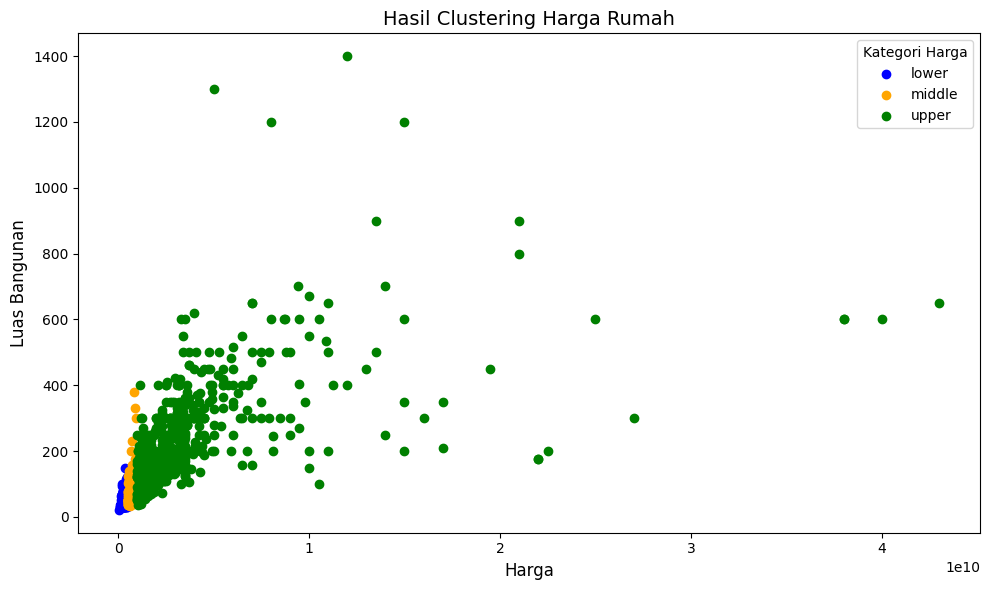

In [276]:
import matplotlib.pyplot as plt

colors = {'lower': 'blue', 'middle': 'orange', 'upper': 'green'}

plt.figure(figsize=(10, 6))
for kategori, warna in colors.items():
    subset = df_cleaned[df_cleaned['kategori_harga'] == kategori]
    plt.scatter(subset['harga'], subset['luas_bangunan'], label=kategori, color=warna)

plt.title('Hasil Clustering Harga Rumah', fontsize=14)
plt.xlabel('Harga', fontsize=12)
plt.ylabel('Luas Bangunan', fontsize=12)
plt.legend(title='Kategori Harga')
plt.tight_layout()
plt.show()


In [277]:
# Mengambil sampling 100 data untuk setiap kategori harga 
sampling_per_category = df_cleaned.groupby('kategori_harga').sample(n=100, random_state=42) 
print(sampling_per_category)

        ID                                              judul         alamat   
58      58  Rumah harga 500 jutaan di Ciwastra.Bangunan mewah       Ciwastra  \
889    889  Hunian Termurah 2lantai Bonus Pagar Lokasi Cil...       Cileunyi   
198    198           RUMAH CLUSTER DP 0% DI RANCAEKEK BANDUNG      Rancaekek   
1272  1272  Cicilan 2,1JT Proses dibantu sampai ACC Lokasi...        Nanjung   
132    132  Harga Bersahabat Rumah Siap Huni Type 40/55 FU...    Bojongsoang   
...    ...                                                ...            ...   
903    903  JUAL RUMAH BISA UNTUK HOMEINDUSTRI TAMAN HOLIS...  Bandung Kulon   
842    842  Dijual Rumah Baru Singgasana Pradana,Murah,Sia...     Mekarwangi   
581    581  Jual rumah minimalis taman holis indah full fu...     Cigondewah   
965    965              Rumah Siap Huni Strategis Batununggal    Batununggal   
472    472       Rumah di Singgasana Pradana Elite Strategis!     Mekarwangi   

                                       

**Detecting missing values after Clustering**


*Mengecek Nilai Null*

In [278]:
missing_value = df_cleaned.isnull().sum()
print(missing_value)

ID                0
judul             0
alamat            0
deskripsi         2
kamar             0
luas_bangunan     0
luas_lahan        0
harga             0
kategori_harga    0
dtype: int64


In [279]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1170 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ID              1170 non-null   int64   
 1   judul           1170 non-null   object  
 2   alamat          1170 non-null   object  
 3   deskripsi       1168 non-null   object  
 4   kamar           1170 non-null   int64   
 5   luas_bangunan   1170 non-null   int64   
 6   luas_lahan      1170 non-null   int64   
 7   harga           1170 non-null   int64   
 8   kategori_harga  1170 non-null   category
dtypes: category(1), int64(5), object(3)
memory usage: 83.5+ KB


**Data Transformation**

**Agregasi**

*Menghitung Rata-Rata Harga rumah*

In [280]:
rata_rata_per_kategori = df_cleaned.groupby('kategori_harga')['harga'].mean()
print("Rata-rata harga rumah per kategori:")
for kategori, rata_rata in rata_rata_per_kategori.items():
    print(f"{kategori}: Rp {rata_rata:,.0f}")

Rata-rata harga rumah per kategori:
lower: Rp 318,670,815
middle: Rp 721,308,192
upper: Rp 3,512,424,501


# Data Modelling

### Labelling Data

In [281]:
df_cleaned.describe()

,ID,kamar,luas_bangunan,luas_lahan,harga
count,1170.000000,1170.000000,1170.000000,1170.000000,1.170000e+03
mean,693.838462,3.312821,159.393162,184.406838,2.285885e+09
std,421.050105,1.241397,145.976161,312.428242,3.614978e+09
min,0.000000,1.000000,21.000000,30.000000,6.500000e+07
25%,319.250000,2.000000,60.000000,74.000000,6.250000e+08
50%,678.000000,3.000000,110.500000,115.500000,1.250000e+09
75%,1042.500000,4.000000,200.000000,195.250000,2.750000e+09
max,1469.000000,7.000000,1400.000000,8000.000000,4.300000e+10


In [282]:
x = df_cleaned.drop(columns=['ID','judul','alamat','deskripsi','harga','kategori_harga'])
y = df_cleaned['harga']

print("Variabel Independen (X): ")
print(x.head())
print("Variabel Dependen (Y): ")
print(y.head())

Variabel Independen (X): 
   kamar  luas_bangunan  luas_lahan
0      3             75          84
1      3             70          71
2      2             36          72
4      2             90         114
5      2             60          60
Variabel Dependen (Y): 
0    590000000
1    700000000
2    386000000
4    397500000
5    557000000
Name: harga, dtype: int64


### Split Dataset

Memisahkan data uji dan data latih sesuai kebutuhan model

Split dataset untuk training dan testing, size data uji sebanyak 20%

In [283]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Build Model

Melatih model Linear Regression

In [284]:
from sklearn.linear_model import LinearRegression   

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

Membuat prediksi dari model yang sudah dilatih, buat prediksi pada data latih maupun data uji (X_train, X_test)

In [285]:
y_pred = linear_model.predict(X_test)

Menampilkan rata-rata kuadrat kesalahan antara nilai prediksi dan nilai aktual


In [306]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squarred Erro: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squarred Erro: 1.0740434726634764e+19
R-squared: 0.4281023139075145


Menampilkan  proporsi varians dalam variabel dependen yang dapat dijelaskan oleh model

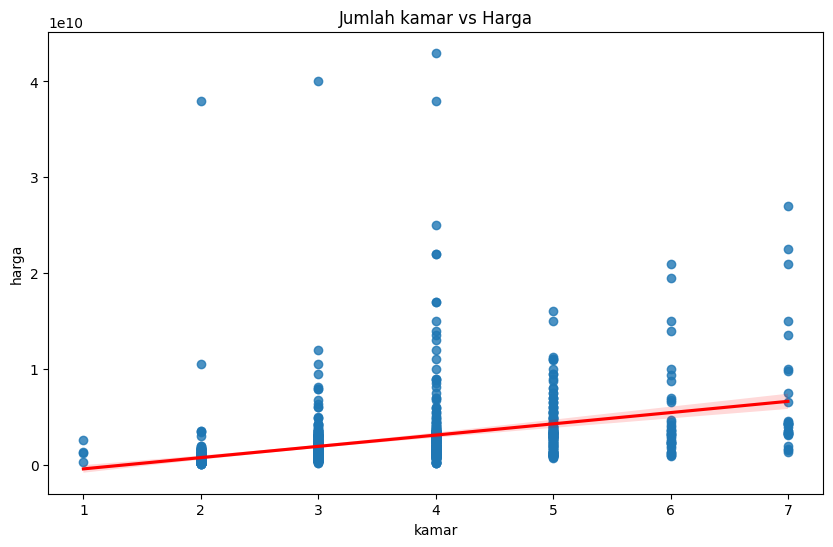

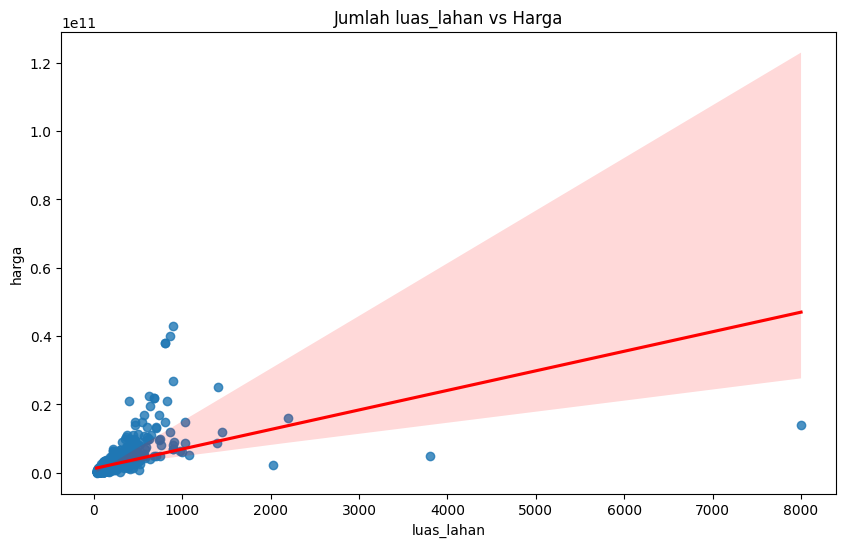

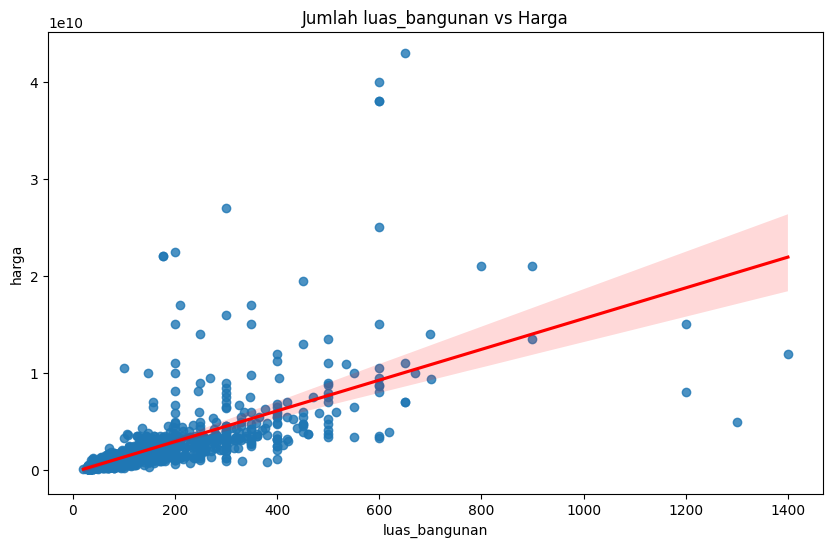

In [288]:
variables = ["kamar", "luas_lahan", "luas_bangunan"]
for var in variables:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=df_cleaned[var], y=df_cleaned["harga"], line_kws={"color": "red"})
    plt.title(f"Jumlah {var} vs Harga")
    plt.xlabel(var)
    plt.ylabel("harga")
    plt.show()

### Implementasi K-Medoids

In [289]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.datasets import make_blobs

In [290]:
# Fitur untuk clustering
features = df_cleaned[['harga', 'luas_bangunan', 'luas_lahan']]

# Standardisasi data untuk mengurangi pengaruh skala
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

**Inisialisasi dan Latih K-Medoid Clustering**

In [291]:
# Inisialisasi K-Medoids
kmedoids = KMedoids(n_clusters=3, random_state=42)

# Latih model
kmedoids.fit(features_scaled)

# Tambahkan label cluster ke dataset
df_cleaned['cluster'] = kmedoids.labels_


***Visualisasi Hasil Clustering***

Visualisasi untuk melihat bagaimana properti dikelompokkan berdasarkan fitur

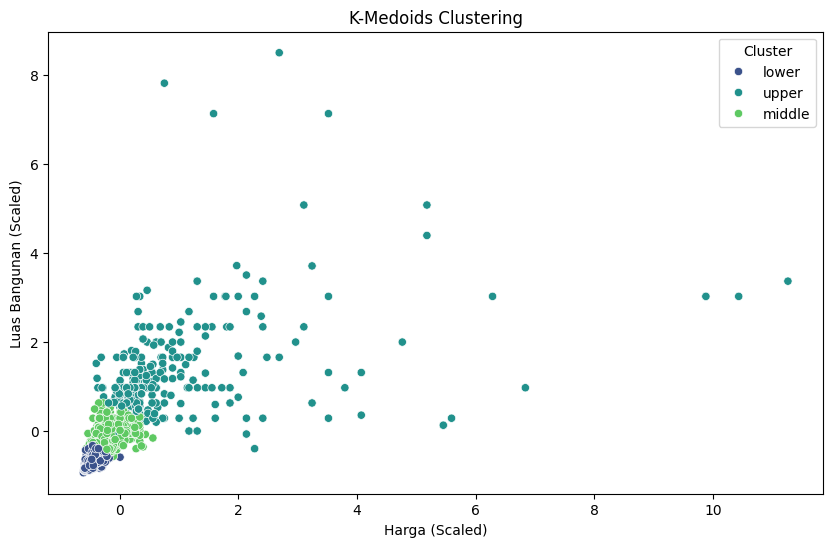

In [293]:
# Mapping cluster numbers to categories
cluster_mapping = {0: 'upper', 1: 'lower', 2: 'middle'}
df_cleaned['cluster'] = df_cleaned['cluster'].map(cluster_mapping)

# Visualisasi dengan scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=features_scaled[:, 0],  # harga (scaled)
    y=features_scaled[:, 1],  # luas bangunan (scaled)
    hue=df_cleaned['cluster'],  # menggunakan kategori
    palette='viridis'
)
plt.title("K-Medoids Clustering")
plt.xlabel("Harga (Scaled)")
plt.ylabel("Luas Bangunan (Scaled)")
plt.legend(title="Cluster")
plt.show()

***Optimal Number of Clusters***


Untuk memastikan jumlah cluster optimal, gunakan metode seperti Elbow Method:

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluste

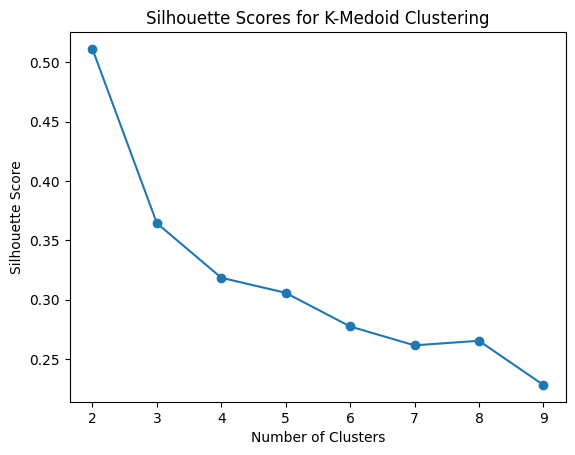

In [ ]:
scores = []
for k in range(2, 10):
    model = KMedoids(n_clusters=k, random_state=42)
    model.fit(features_scaled)
    scores.append(silhouette_score(features_scaled, model.labels_))

# Plot silhouette scores
plt.plot(range(2, 10), scores, marker='o')
plt.title("Silhouette Scores for K-Medoid Clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()


Gambar yang Anda unggah menunjukkan grafik **Silhouette Scores** untuk K-Medoid Clustering dengan berbagai jumlah klaster (K). Berikut adalah penjelasannya:

1. **Sumbu X (Number of Clusters)**: Menunjukkan jumlah klaster (K) yang diuji, mulai dari 2 hingga 9 klaster.
2. **Sumbu Y (Silhouette Score)**: Menunjukkan nilai Silhouette Score, yang mengukur kualitas klaster. Nilai ini berkisar antara -1 hingga 1:
   - **Mendekati 1**: Titik data berada dengan baik di dalam klasternya dan jauh dari klaster lainnya (klaster yang baik).
   - **Mendekati 0**: Titik data berada di perbatasan antara dua klaster.\n   - **Negatif**: Titik data lebih dekat dengan klaster lain dibandingkan dengan klasternya sendiri.

3. **Interpretasi Grafik**:
   - Silhouette Score tertinggi terjadi pada K=2 (sekitar 0.5), menunjukkan bahwa pembagian data ke dalam 2 klaster memberikan klasterisasi terbaik.
   - Setelah K=2, nilai Silhouette Score menurun secara bertahap, artinya kualitas klasterisasi menurun ketika jumlah klaster meningkat. Ini menunjukkan bahwa menambahkan lebih banyak klaster tidak selalu meningkatkan kualitas pengelompokan, tetapi dapat membuat klasterisasi menjadi terlalu granular.
   - Pada nilai K yang lebih tinggi (7-9), Silhouette Score cenderung stabil pada nilai rendah (~0.25), menandakan klaster yang kurang terdefinisi dengan baik.

**Kesimpulan**:
Dari grafik ini, K=2 mungkin adalah jumlah klaster yang optimal untuk data ini, karena memberikan nilai Silhouette Score tertinggi, menunjukkan klasterisasi terbaik berdasarkan jarak antar data.

### Evaluasi Model ###

In [300]:
# Data Sintetis
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Model K-Medoids
kmedoids = KMedoids(n_clusters=4, random_state=42)
kmedoids.fit(X)
labels = kmedoids.labels_

# Evaluasi Model
silhouette = silhouette_score(X, labels)
davies_bouldin = davies_bouldin_score(X, labels)

print(f"Silhouette Coefficient: {silhouette}")
print(f"Davies-Bouldin Score: {davies_bouldin}")

Silhouette Coefficient: 0.6167441178816216
Davies-Bouldin Score: 0.7822122844142265


***Silhouette Coefficient (0.617):***

Nilai ini mendekati 1, menunjukkan bahwa cluster yang dihasilkan cukup baik.
Objek dalam cluster memiliki kohesi yang tinggi (berdekatan dengan pusat cluster) dan antar cluster memiliki separasi yang cukup baik.

***Davies-Bouldin Score (0.782):***

Nilai ini relatif rendah, menunjukkan bahwa cluster yang dihasilkan cukup terpisah dengan baik dan tidak terlalu saling tumpang tindih.
Kesimpulan:
Model clustering K-Medoids menghasilkan performa yang baik dengan nilai evaluasi yang cukup memadai.
Berdasarkan Silhouette Coefficient, cluster menunjukkan kualitas yang baik dari segi kohesi dan separasi.
Davies-Bouldin Score juga mendukung hal ini, di mana nilai yang rendah mengindikasikan separasi antar cluster yang cukup jelas.

In [301]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(linear_model, f)

In [302]:
with open("model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

In [303]:
!ngrok config add-authtoken 2qkBhYEKQ2Tx3knyFgmJFv7z0do_81Sm9E7MEuft3v6Fh4s24

Authtoken saved to configuration file: C:\Users\ASUS\AppData\Local/ngrok/ngrok.yml


In [304]:

from pyngrok import ngrok
import threading
import os

In [305]:
import os
import threading

def run_streamlit():
    os.system("streamlit run dashboard.py --server.port 8080")

thread = threading.Thread(target=run_streamlit)
thread.start()

print("Streamlit is running on http://localhost:8080")


Streamlit is running on http://localhost:8080
